## Data Exploration

### 1. Import:

In [1]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Data exploration:

#### 2.1. Read data from file:

In [2]:
path = os.path.join('..', 'Assert', 'ingredients.csv')
raw_df = pd.read_csv(path)
raw_df.head()

,Name of dish,active yeast,agave nectar,all-purpose flour,almond,almond extract,almond flour,almond milk,aloe vera,amaretto,...,yellow bell peppers,yellow lemon peel,yellow mustard,yellow pepper,yellow sweet potatoes,yogurt,yogurt drink,yuzu juice,yuzu sauce,zucchini
0,Change the taste with strange and delicious mi...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Spaghetti with Meatballs in Tomato Sauce, Quee...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,European Style Baked Spiced Potatoes,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Spicy and Flavorful Braised Pork with Pepper, ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Simple, Delicious, and Mesmerizing Swedish Bak...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 2.2. Explore data:

##### - How many rows and how many columns?

In [3]:
shape = raw_df.shape
shape

(681, 803)

The raw dataset has *...* rows and *...* columns, which satisfies the requirements about the size of dataset.

##### - What are the meaning of each row?

Each row contains the information about the ingredients of a dish.

##### - Are there duplicated rows?

In [4]:
def count_duplicated_rows(df: pd.DataFrame) -> bool:
    duplicated_df = df[df.duplicated(keep='first')]
    num_duplicated = duplicated_df.shape[0]
    return num_duplicated

In [5]:
print(f"Number of duplicated rows: {count_duplicated_rows(raw_df)}")

Number of duplicated rows: 69


The raw dataset contains ... duplicated rows, so let's remove them.

In [6]:
raw_df = raw_df.drop_duplicates()

In [7]:
print(f"Number of duplicated rows after update raw data: {count_duplicated_rows(raw_df)}")

Number of duplicated rows after update raw data: 0


##### - What are the meaning of each column?

- The first column `Name of dish` contains the name of each dish.
- The remaining columns represent each ingredient with the value of each cell in the column being 0 if the dish doesn't have this ingredient and 1 if it has.

##### - What is the current data type of each column? Are there columns having inappropriate data types?

In [8]:
# convert to dictionary in order to be easier to see the data type of all columns
raw_df.dtypes.to_dict()

{'Name of dish': dtype('O'),
 'active yeast': dtype('int64'),
 'agave nectar': dtype('int64'),
 'all-purpose flour': dtype('int64'),
 'almond': dtype('int64'),
 'almond extract': dtype('int64'),
 'almond flour': dtype('int64'),
 'almond milk': dtype('int64'),
 'aloe vera': dtype('int64'),
 'amaretto': dtype('int64'),
 'american beef belly': dtype('int64'),
 'anchovy': dtype('int64'),
 'annatto powder': dtype('int64'),
 'annatto seeds': dtype('int64'),
 'apple': dtype('int64'),
 'apple cider vinegar': dtype('int64'),
 'apple juice': dtype('int64'),
 'apricot': dtype('int64'),
 'apricot jam': dtype('int64'),
 'arrowroot powder': dtype('int64'),
 'artichoke': dtype('int64'),
 'asparagus': dtype('int64'),
 'avocado': dtype('int64'),
 'back ribs tips': dtype('int64'),
 'back-fat': dtype('int64'),
 'bacon': dtype('int64'),
 'bagel': dtype('int64'),
 'baguette': dtype('int64'),
 'baking powder': dtype('int64'),
 'baking soda': dtype('int64'),
 'balsamic vinegar': dtype('int64'),
 'balut eggs'

All the columns of the raw data seem to have appropritate types for their meanings.

##### - With each numerical column, how are values distributed?

- What is the percentage of missing values?

In [9]:
# collect numerical columns' data
numerical_cols = raw_df[raw_df.keys()[1:]]
numerical_cols.head()

,active yeast,agave nectar,all-purpose flour,almond,almond extract,almond flour,almond milk,aloe vera,amaretto,american beef belly,...,yellow bell peppers,yellow lemon peel,yellow mustard,yellow pepper,yellow sweet potatoes,yogurt,yogurt drink,yuzu juice,yuzu sauce,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# check if there are any missing values
missing_values = numerical_cols.isnull().sum()
missing_values

active yeast         0
agave nectar         0
all-purpose flour    0
almond               0
almond extract       0
                    ..
yogurt               0
yogurt drink         0
yuzu juice           0
yuzu sauce           0
zucchini             0
Length: 802, dtype: int64

In [11]:
if all(missing_values == 0):
    print("No missing values in the numerical columns")

No missing values in the numerical columns


- Min? Max? Are they abnormal?

In [12]:

if all(numerical_cols.min() == 0) and all(numerical_cols.max() == 1):
    print("All the values of numerical columns are normal (between 0 and 1).")
else:
    abnormal_columns = numerical_cols.columns[
        ~((0 <= numerical_cols.min() <= 1) & (0 <= numerical_cols.max() <= 1))
    ]
    print(f"There are some values that are not normal in columns: {abnormal_columns}.")

All the values of numerical columns are normal (between 0 and 1).


##### - With each categorical column, how are values distributed?

- What is the percentage of missing values?

In [13]:
# collect categorical columns' data
categorical_col = raw_df[raw_df.keys()[0]]
categorical_col.head()

0    Change the taste with strange and delicious mi...
1    Spaghetti with Meatballs in Tomato Sauce, Quee...
2                 European Style Baked Spiced Potatoes
3    Spicy and Flavorful Braised Pork with Pepper, ...
4    Simple, Delicious, and Mesmerizing Swedish Bak...
Name: Name of dish, dtype: object

In [14]:
# check if there are any missing values
missing_values = categorical_col.isnull().sum()
missing_values

0

In [15]:
if missing_values == 0:
    print("No missing values in the categorical columns")

No missing values in the categorical columns


- How many different values? Show a few


In [16]:
# find unique values
unique_values = categorical_col.unique()
print(f"There are {len(unique_values)} different values in this column.")

There are 600 different values in this column.


In [17]:
print('Some examples of name of dish:\n', unique_values[:10])

Some examples of name of dish:
 ['Change the taste with strange and delicious mixed chicken pho that you can eat forever without getting bored'
 'Spaghetti with Meatballs in Tomato Sauce, Queen of Italian Cuisine'
 'European Style Baked Spiced Potatoes'
 "Spicy and Flavorful Braised Pork with Pepper, a Dish You Can't Put Down Your Chopsticks for on a Winter Day"
 'Simple, Delicious, and Mesmerizing Swedish Baked Hasselback Potatoes'
 "Braised Duck with dracontomelon – A Dish That Defies All Weather, Making Many People Fall in Love Whether It's Winter or Summer"
 'Crispy Outside, Melty Inside Fried Cheese Bread Rolls'
 'Egg-Topped Tortillas - A Quick, Nutritious and Delicious Breakfast'
 'Shrimp Spaghetti with Tomato Cream Sauce - Mildly Sour, Rich, Rich and Extremely Delicious'
 'How to make spring rolls with river bone leaves - a fragrant dish in early winter']


#### Check if the data is reasonable?
 - Is there any item where the ingredients are all 0?
 - Is there any column where all values ​​are 0?

In [18]:
# Check rows
all_zero_ingredients = raw_df[(raw_df.iloc[:, 1:] == 0).all(axis=1)]
num_all_zero_ingredients = all_zero_ingredients.shape[0]
num_all_zero_ingredients
if num_all_zero_ingredients > 0:
    print(f"Number of rows that all ingredients are zero: {num_all_zero_ingredients}")
    raw_df = raw_df.drop(all_zero_ingredients.index)
    print("Remove all zero ingredients rows.")
# check columns
raw_df = raw_df.loc[:, ~(raw_df == 0).all()]

### ___3. Data analysis:___
#### ___Phần 1: Phân tích sự phổ biến của các nguyên liệu thành phần và khả năng kết hợp của chúng___
#### __1. Sự phổ biến của thành phần__

In [19]:
#Xác định thành phần nào được sử dụng phổ biến nhất trong các món ăn (ví dụ: sử dụng tổng số 1 trong từng cột).
# tính tổng từng cột, tìm top 10 cột có giá trị lớn nhất
sum_cols = raw_df.iloc[:, 1:].sum()
top_20_cols = sum_cols.nlargest(20)
top_20_cols

salt                 356
pepper               208
water                208
sugar                207
garlic               137
egg                  130
onion                124
cooking oil           98
unsalted butter       85
milk                  83
olive oil             80
fish sauce            77
vanilla extract       64
flour                 57
ginger                56
lemon                 54
coriander             51
all-purpose flour     48
honey                 48
carrot                47
dtype: int64

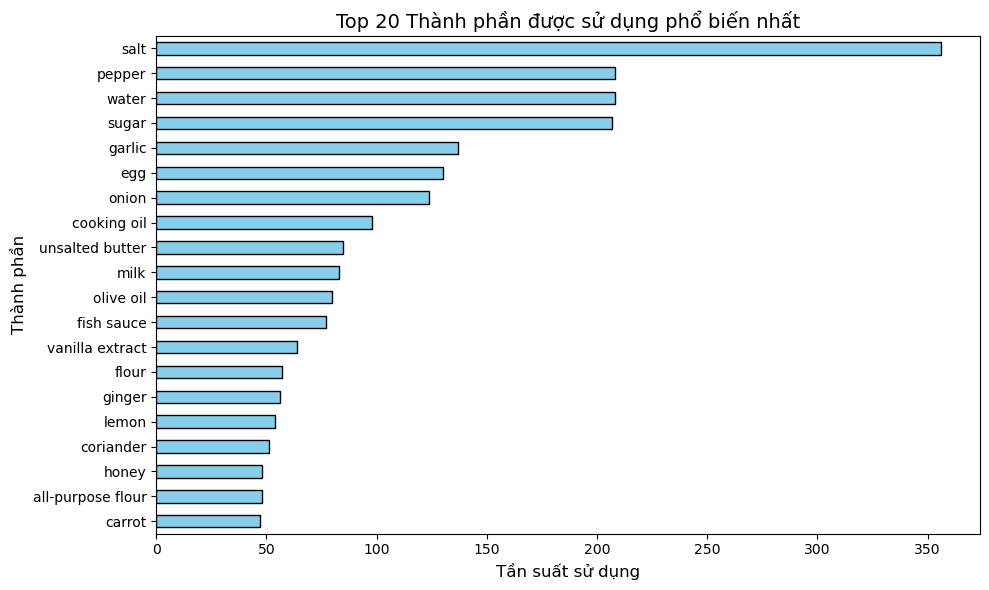

In [20]:
#trực quan hóa dữ liệu
# vẽ biểu đồ cột ngang cho top 10 nguyên lieu pho biến nhat

# Vẽ biểu đồ cột ngang
plt.figure(figsize=(10, 6))
top_20_cols.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')

# Thêm tiêu đề và nhãn
plt.title('Top 20 Thành phần được sử dụng phổ biến nhất', fontsize=14)
plt.xlabel('Tần suất sử dụng', fontsize=12)
plt.ylabel('Thành phần', fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()



#### ___Nhận xét___
- Nguyên liệu phổ biến nhất:
    - ___Muối (salt)___ là thành phần được sử dụng phổ biến nhất, với tần suất vượt trội (gần 350). Đây là một nguyên liệu cơ bản trong hầu hết các món ăn, đặc biệt là trong các món mặn.
- Các nguyên liệu có tần suất cao:
    - ___Tiêu (pepper)___ và ___nước (water)___ cũng có tần suất sử dụng rất cao, điều này cho thấy các nguyên liệu này thường xuyên xuất hiện trong các công thức món ăn.
- Nhóm nguyên liệu cơ bản:
    - Các thành phần như ___đường (sugar)___, ___tỏi (garlic)___, và ___trứng (egg)___ đều có tần suất sử dụng đáng kể, chứng tỏ chúng là nguyên liệu cơ bản trong nhiều món ăn.
- Nhóm nguyên liệu phụ:
    - Các thành phần như ___hành (onion)___,___dầu ăn (cooking oil)___, và ___bơ không muối (unsalted butter)___ nằm trong nhóm nguyên liệu phụ, với tần suất sử dụng thấp hơn nhưng vẫn quan trọng trong việc tạo hương vị và cấu trúc cho món ăn.
- Tần suất thấp:
    - ___Sữa (milk)___ có tần suất thấp hơn so với các nguyên liệu khác, tuy nhiên vẫn là một thành phần quan trọng trong nhiều món ăn, đặc biệt là trong các món bánh hoặc món ăn sáng.

#### ___Một số thông tin hữu ích___
- Các nguyên liệu như muối, tiêu, nước, và đường có vẻ như là các thành phần cơ bản và đa dụng nhất trong các công thức món ăn.
- Những thành phần như tỏi, hành, và trứng có thể được sử dụng trong các món ăn mặn hoặc món ăn chế biến nhanh.
- Dầu ăn và bơ thường được sử dụng để chiên xào hoặc tạo độ béo cho các món ăn, trong khi sữa có tần suất thấp, có thể chỉ được dùng trong các công thức đặc biệt như làm bánh, chế biến các món ăn ngọt hoặc món ăn sáng.

#### __2. Khả năng kết hợp của các thành phần phổ biến__ 

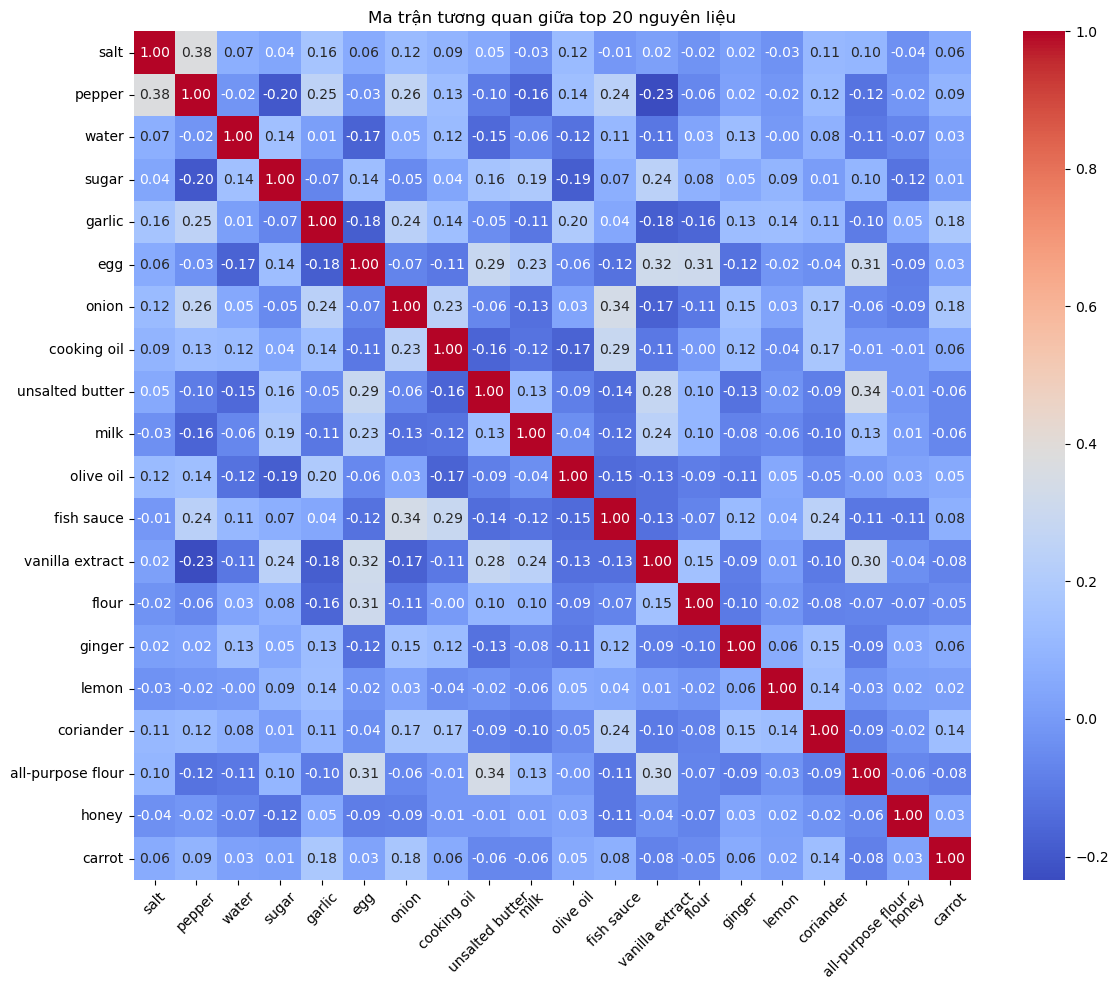

In [21]:
# vẽ ma trận tương quan giữa top 20 nguyên liệu trên
# Lọc raw_df chỉ với top 20 nguyên liệu

filtered_df = raw_df[top_20_cols.index]
# Tính ma trận tương quan
correlation_matrix = filtered_df.corr()

# Vẽ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Ma trận tương quan giữa top 20 nguyên liệu')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### ___Phần 2: Phân tích độ phức tạp của các món ăn dựa trên số lượng nguyên liệu cũng như độ phổ biến của chúng___

#### **1. Đánh giá độ phức tạp**

In [22]:
# số lượng nguyên liệu trong mỗi món ăn
ingredient_count = raw_df.iloc[:, 1:].sum(axis=1)
# tìm tần số xuất hiện của các nguyên liệu
ingredient_frequency = raw_df.iloc[:, 1:].sum()
# chuẩn hóa tần số xuất hiện của từng nguyên liệu về khoảng 0-1
normalized_ingredient_frequency = (ingredient_frequency - ingredient_frequency.min()) / (ingredient_frequency.max() - ingredient_frequency.min())

# tính điểm độ phức tạp
complexity_score = raw_df.mul(1-normalized_ingredient_frequency, axis=1).sum(axis=1)

# tạo dataframe tạm thời để lưu điểm độ phức tạp
temp_df = raw_df.copy()
temp_df['Complexity Score'] = complexity_score

# chia mức độ phức tạp thành 5 nhóm
def assign_stars(score, max_score):
    if score >= 0.8 * max_score:
        return 5
    elif score >= 0.6 * max_score:
        return 4
    elif score >= 0.4 * max_score:
        return 3
    elif score >= 0.2 * max_score:
        return 2
    else:
        return 1
    
max_score = temp_df['Complexity Score'].max()
temp_df['Complexity Level'] = temp_df['Complexity Score'].apply(lambda x: assign_stars(x, max_score))


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10704\2904085999.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Complexity Level', data=temp_df, palette='coolwarm', edgecolor='black')


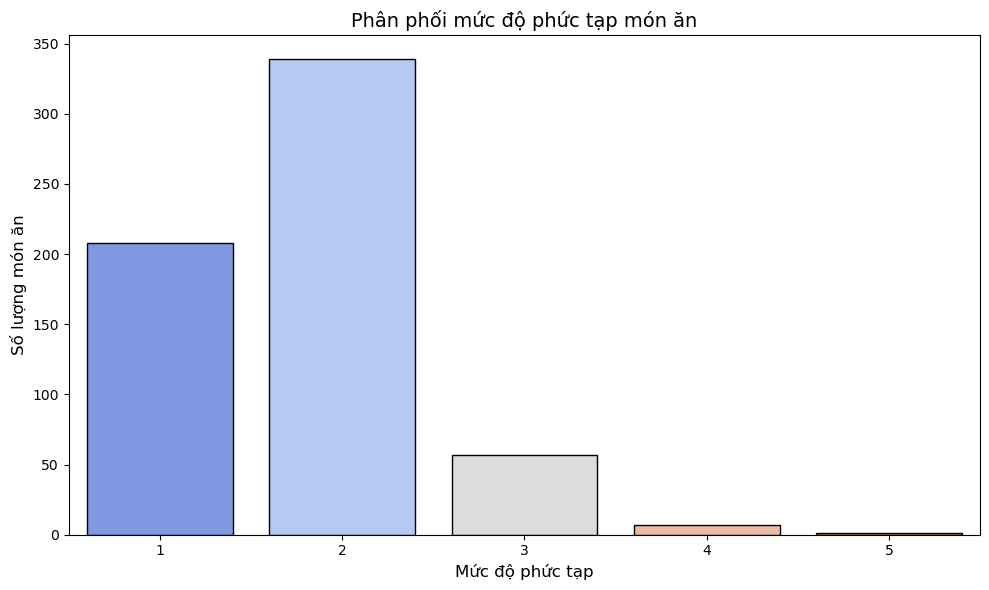

In [23]:
# vẽ biểu đồ phân phối mức độ phức tạp
plt.figure(figsize=(10, 6))
sns.countplot(x='Complexity Level', data=temp_df, palette='coolwarm', edgecolor='black')
plt.title('Phân phối mức độ phức tạp món ăn', fontsize=14)
plt.xlabel('Mức độ phức tạp', fontsize=12)
plt.ylabel('Số lượng món ăn', fontsize=12)
plt.tight_layout()
plt.show()


#### **Nhận xét**
- Đa số các món ăn trong dataset tạp trung ở mức độ phức tạp từ dễ đến trung bình (1-3).
- Các món có độ phức tạp cao hơn rất ít, cho thấy các món ăn đòi hỏi nhiểu nguyên liệu hiếm gặp, ít sử dụng là không phổ biến trong các món ăn thường ngày.
- Cụ thể, mức độ phức tạp **2** chiếm số lượng lớn nhất (khoảng 350 món ăn).
Tiếp đến là mức độ phức tạp **1** đứng thứ hai với hơn 200 món ăn. Còn lại, số lượng các món ăn được đánh giá ở các mức **3**, **4**, và **5** giảm dần rõ rệt, đặc biệt mức **5** chỉ chiếm tầm 1-5 món.

#### **2. Top món ăn có độ phức tạp cao**

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10704\802646360.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Complexity Score', y='Name of dish', data=top_complex_meals, palette='coolwarm', edgecolor='black')


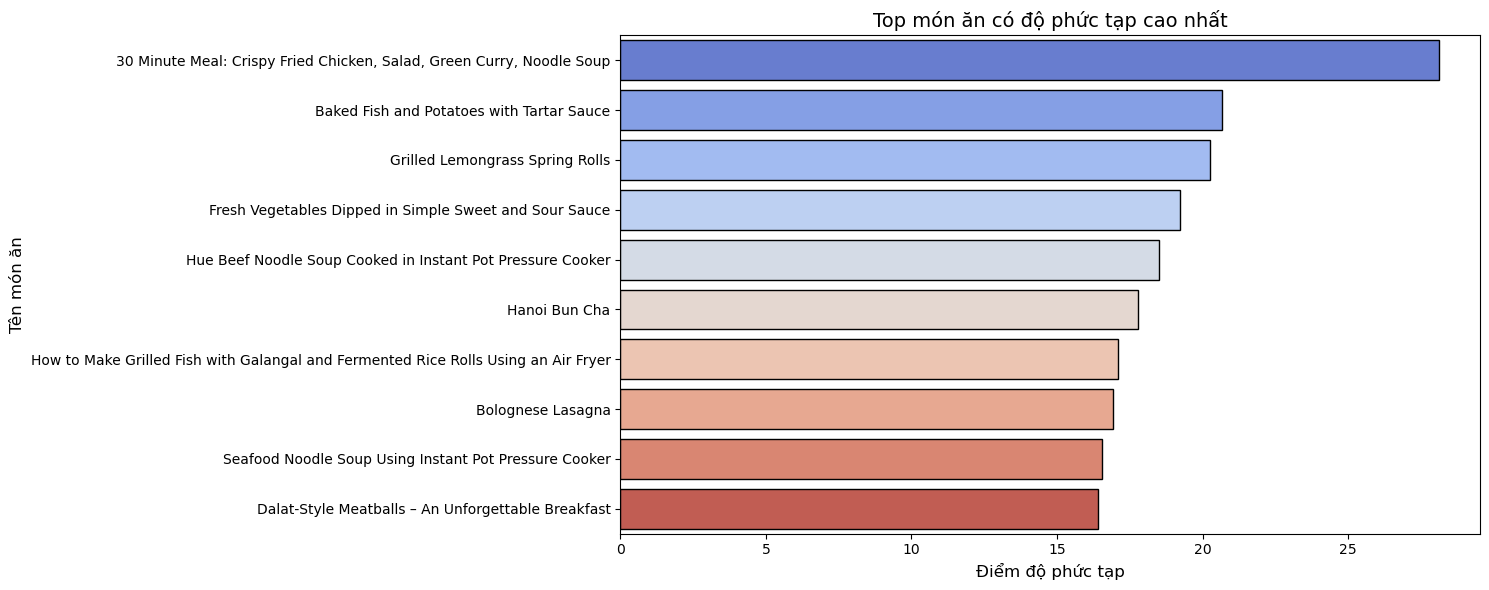

In [24]:
# top món ăn có độ phức tạp cao nhất
top_complex_meals = temp_df.sort_values('Complexity Score', ascending=False).head(10)[['Name of dish', 'Complexity Score']]

# vẽ biểu đồ cột cho top món ăn có độ phức tạp cao nhất
plt.figure(figsize=(15, 6))
sns.barplot(x='Complexity Score', y='Name of dish', data=top_complex_meals, palette='coolwarm', edgecolor='black')
plt.title('Top món ăn có độ phức tạp cao nhất', fontsize=14)
plt.xlabel('Điểm độ phức tạp', fontsize=12)
plt.ylabel('Tên món ăn', fontsize=12)
plt.tight_layout()
plt.show()


In [25]:
print('Số lượng nguyên liệu trong mỗi món ăn trên:\n')
result = "\n".join(
    f"{i+1}. Món {raw_df.loc[top_complex_meals.index[i], 'Name of dish']}: {ingredient_count[top_complex_meals.index[i]]}"
    for i in range(len(top_complex_meals))
)
print(result)


Số lượng nguyên liệu trong mỗi món ăn trên:

1. Món 30 Minute Meal: Crispy Fried Chicken, Salad, Green Curry, Noodle Soup: 31
2. Món Baked Fish and Potatoes with Tartar Sauce: 24
3. Món Grilled Lemongrass Spring Rolls: 24
4. Món Fresh Vegetables Dipped in Simple Sweet and Sour Sauce: 22
5. Món Hue Beef Noodle Soup Cooked in Instant Pot Pressure Cooker: 21
6. Món Hanoi Bun Cha: 22
7. Món How to Make Grilled Fish with Galangal and Fermented Rice Rolls Using an Air Fryer: 21
8. Món Bolognese Lasagna: 21
9. Món Seafood Noodle Soup Using Instant Pot Pressure Cooker: 21
10. Món Dalat-Style Meatballs – An Unforgettable Breakfast: 21


#### **Nhận xét**
- Món *Gà rán giòn, Salat, Cà Ri Xanh, Mỳ Trộn* (*30 Minute Meal: Crispy Fried Chicken, Salad, Green Curry, Noodle Soup*) có điểm phức tạp cao nhất, vượt trội so với các món ăn còn lại, món ăn bao gồm nhiều loại nguyên liệu khác nhau và sử dụng một số nguyên liệu ít phổ biến.
- Các món còn lại không có sự chênh lệch quá nhiều, có điểm phức tạp tập trung dao động ở mức 18-21 và số lượng nguyên liệu của các món này nằm trong khoảng 18-20 nguyên liệu/món.

#### **3. Top món ăn có độ phức tạp thấp**

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10704\3318202588.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Complexity Score', y='Name of dish', data=top_less_complex_meals, palette='coolwarm', edgecolor='black')


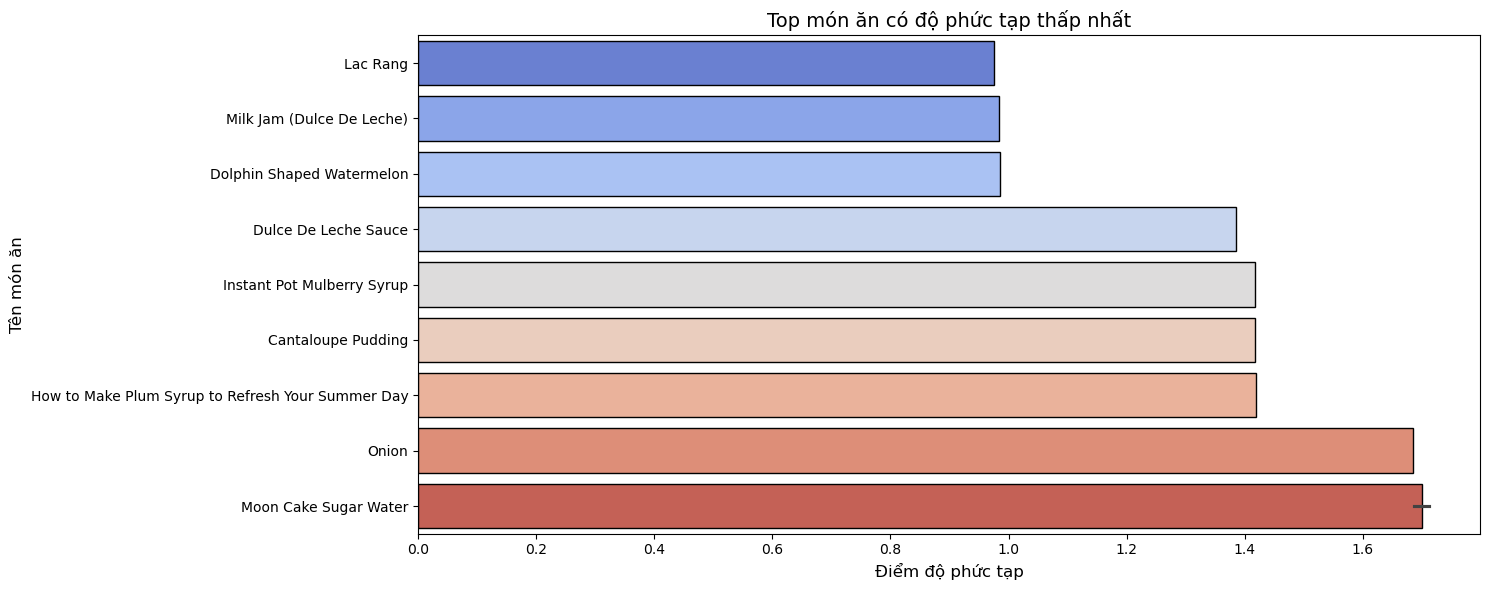

In [26]:
# top món ăn có độ phức tạp thấp nhất
top_less_complex_meals = temp_df.sort_values('Complexity Score', ascending=True).head(10)[['Name of dish', 'Complexity Score']]

# vẽ biểu đồ cột cho top món ăn có độ phức tạp thấp nhất
plt.figure(figsize=(15, 6))
sns.barplot(x='Complexity Score', y='Name of dish', data=top_less_complex_meals, palette='coolwarm', edgecolor='black')
plt.title('Top món ăn có độ phức tạp thấp nhất', fontsize=14)
plt.xlabel('Điểm độ phức tạp', fontsize=12)
plt.ylabel('Tên món ăn', fontsize=12)
plt.tight_layout()
plt.show()


In [27]:
print('Số lượng nguyên liệu trong mỗi món ăn trên:\n')
result = "\n".join(
    f"{i+1}. Món {raw_df.loc[top_less_complex_meals.index[i], 'Name of dish']}: {ingredient_count[top_less_complex_meals.index[i]]}"
    for i in range(len(top_less_complex_meals))
)
print(result)


Số lượng nguyên liệu trong mỗi món ăn trên:

1. Món Lac Rang: 1
2. Món Milk Jam (Dulce De Leche): 2
3. Món Dolphin Shaped Watermelon: 1
4. Món Dulce De Leche Sauce: 2
5. Món Instant Pot Mulberry Syrup: 2
6. Món Cantaloupe Pudding: 2
7. Món How to Make Plum Syrup to Refresh Your Summer Day: 2
8. Món Onion: 2
9. Món Moon Cake Sugar Water: 3
10. Món Moon Cake Sugar Water: 3


#### **Nhận xét:**
- Ngược lại với các món phức tạp ở phía trên, các món ăn ít phức tạp nhất chỉ cần số ít nguyên liệu để thực hiện (1-3 nguyên liệu).
- Tuy nhiên, mỗi món ăn trên có điểm phức tạp khác nhau tùy thuộc vào mức độ phổ biến của các nguyên liệu chúng sử dụng